# r.earthworks

This notebook runs the example from r.earthworks's manual page and visualizes the output.

## Setup

We will be using the NC SPM sample location.

In [26]:
import os
import json
import subprocess
import sys

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

## Start GRASS Session
session = gj.init("~/grassdata/nc_spm_08_grass7/user1")

## Start GRASS Session
#gj.init("~/data/grassdata/nc_basic_spm_grass7/user1")

## Install

In [37]:
gs.run_command(
    "g.extension",
    extension="r.earthworks",
    url="https://github.com/baharmon/r.earthworks"
)

## Operations

Set the computational region and generate a flat terrain with map algebra.

In [92]:
gs.run_command('g.region', n=1000, e=1000, s=0, w=0, res=1)
gs.mapcalc('elevation = 0')

### Peak
Model a peak from a set of x- and y-coordinates with `r.earthworks`. Use the `z` parameter to set a z-coordinate for the top of the peak. Optionally use the `flat` parameter to create a plateau at the top of the peak. 

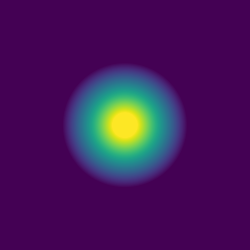

In [116]:
# model earthworks
gs.run_command(
    'r.earthworks',
    elevation='elevation',
    earthworks='peak',
    coordinates=[500,500],
    z=100,
    flat=50,
    rate=0.5
)

# visualize
m = gj.Map(width=250)
m.d_rast(map="peak")
m.show()

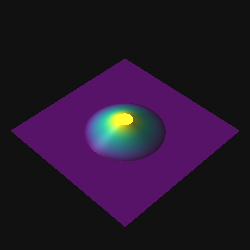

In [122]:
# visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(elevation_map="peak", height=2500, perspective=25, bgcolor=[17, 17, 17])
map3d.show()

### Pit
Model a pit from a set of x- and y-coordinates with `r.earthworks`. Set a z-coordinate for the bottom of the pit.

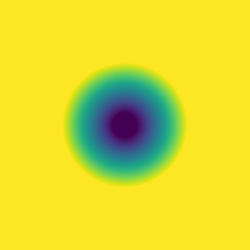

In [125]:
# model earthworks
gs.run_command(
    'r.earthworks',
    elevation='elevation',
    earthworks='pit',
    coordinates=[500,500],
    z=-100,
    flat=50,
    rate=0.5
)

# visualize
m = gj.Map(width=250)
m.d_rast(map="pit")
m.show()

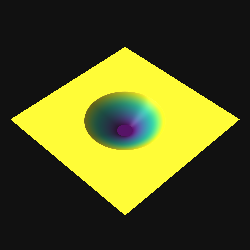

In [126]:
# visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(elevation_map="pit", height=2500, perspective=25, bgcolor=[17, 17, 17])
map3d.show()

### Random Peaks and Pits
Model random pits and peaks with `r.random` and `r.earthworks`.

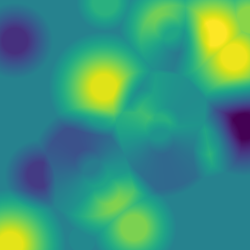

In [29]:
# generate random points
gs.run_command(
    'r.surf.random',
    out='surface',
    min=0,
    max=100
)
gs.run_command(
    'r.random',
    input='elevation',
    npoints=25,
    cover='surface',
    raster='random',
    flags='s'
)

# model earthworks
gs.run_command(
    'r.earthworks',
    elevation='elevation',
    earthworks='random_earthworks',
    operation='fill',
    raster='random',
    rate=0.5,
    flat=50,
)

# visualize
m = gj.Map(width=250)
m.d_rast(map="random_earthworks")
m.show()

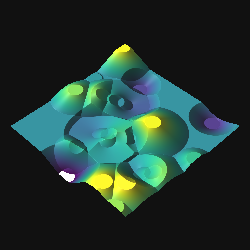

In [30]:
# visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(elevation_map="random_earthworks", height=2500, zexag=1, perspective=25, bgcolor=[17, 17, 17])
map3d.show()